H, W: 28 28


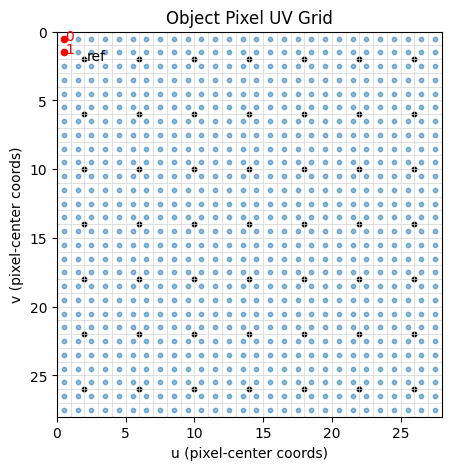

uv_hw shape: (784, 2)
First 5 entries of uv_hw flattened view:
[[0.5 0.5]
 [0.5 1.5]
 [0.5 2.5]
 [0.5 3.5]
 [0.5 4.5]]


In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("asm_full_opt")

from pixel_map import PixelMap
from generate_waves import GenerateWaves
import config

gw = GenerateWaves(config)
uv_samples, pixel_to_sample = gw.sample_field_points(strategy="block")

uv_ref = gw.uv_samples.detach().cpu().numpy()
u_ref = uv_ref[:, 0]
v_ref = uv_ref[:, 1]
H, W = pixel_to_sample.shape[0], pixel_to_sample.shape[1]
print("H, W:", H, W)


pm = PixelMap(config)

# Generate uv grid
uv = pm.pixel_uv_grid(flatten=True).cpu().numpy()  # [H*W, 2]

# Extract first two points
p0 = uv[0]
p1 = uv[1]

plt.figure(figsize=(5, 5))
# draw grid
for k in range(W+1):
    plt.plot([k, k], [0, H], linewidth=0.5, color="lightgray")
for k in range(H+1):
    plt.plot([0, W], [k, k], linewidth=0.5, color="lightgray")

plt.scatter(uv[:, 0], uv[:, 1], s=10, alpha=0.5, label="All pixel centers")

# Highlight first two points
plt.scatter(p0[0], p0[1], c="red", s=20, marker="o", label="uv[0]")
plt.scatter(p1[0], p1[1], c="red", s=20, marker="o", label="uv[1]")

# Annotate them
plt.text(p0[0] + 0.1, p0[1] + 0.1, "0", color="red", fontsize=10)
plt.text(p1[0] + 0.1, p1[1] + 0.1, "1", color="red", fontsize=10)


# all points except first
plt.scatter(u_ref, v_ref, s=10, color='k')
plt.text(u_ref[0] + 0.15, v_ref[0] + 0.1, "ref", color="k", fontsize=10)


plt.xlim(0, W)
plt.ylim(H, 0)
plt.gca().set_aspect("equal")
plt.xlabel("u (pixel-center coords)")
plt.ylabel("v (pixel-center coords)")
plt.title("Object Pixel UV Grid")
plt.show()


print("uv_hw shape:", uv.shape)
print("First 5 entries of uv_hw flattened view:")
print(uv[:5])


In [2]:
# Get uv grid without flattening
uv_hw = pm.pixel_uv_grid(flatten=False).cpu().numpy()  

print("uv_hw shape:", uv_hw.shape)

print("\nExplicit indexing uv_hw[u, v] for first few u,v:")
for u in range(2):
    for v in range(3):
        print(f"uv_hw[{u},{v}] = {uv_hw[u, v].tolist()}")


uv_hw shape: (28, 28, 2)

Explicit indexing uv_hw[u, v] for first few u,v:
uv_hw[0,0] = [0.5, 0.5]
uv_hw[0,1] = [0.5, 1.5]
uv_hw[0,2] = [0.5, 2.5]
uv_hw[1,0] = [1.5, 0.5]
uv_hw[1,1] = [1.5, 1.5]
uv_hw[1,2] = [1.5, 2.5]


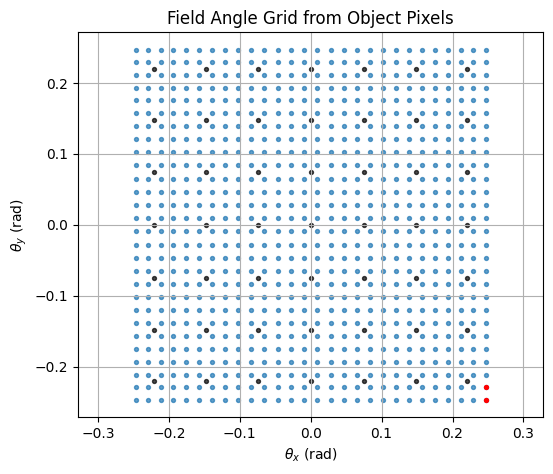

In [12]:
import numpy as np
theta_x, theta_y = pm.uv_to_angles_pixels(uv, gw)

theta_x_ref, theta_y_ref = gw.uv_to_angles(uv_samples)

tx = theta_x.cpu().numpy()
ty = theta_y.cpu().numpy()

tx_ref = theta_x_ref.cpu().numpy()
ty_ref = theta_y_ref.cpu().numpy()

plt.figure(figsize=(6, 5))
plt.scatter(tx, ty, s=8, alpha=0.7)
plt.scatter(tx[0:2], ty[0:2], s=8, color="red")
plt.scatter(tx_ref, ty_ref, s=8, alpha=0.7, color="black")
plt.xlabel(r"$\theta_x$ (rad)")
plt.ylabel(r"$\theta_y$ (rad)")
plt.title("Field Angle Grid from Object Pixels")
plt.axis("equal")
plt.grid(True)
plt.show()


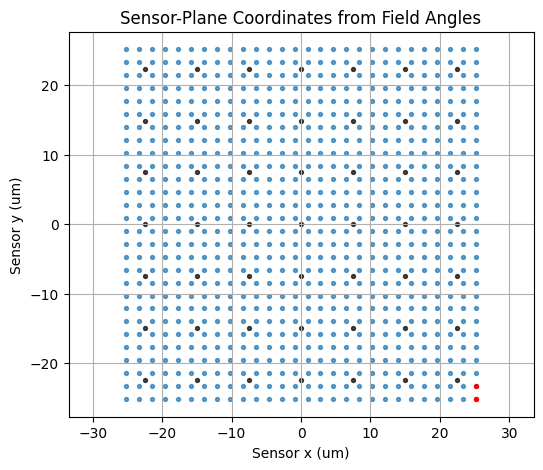

In [13]:
# Convert angles to sensor-plane coordinates
sensor_x, sensor_y = pm.angles_to_sensor_xy(theta_x, theta_y)
sensor_x_ref, sensor_y_ref = pm.angles_to_sensor_xy(theta_x_ref, theta_y_ref)

# Convert to numpy
sx = sensor_x.cpu().numpy()
sy = sensor_y.cpu().numpy()
sx_ref = sensor_x_ref.cpu().numpy()
sy_ref = sensor_y_ref.cpu().numpy()
plt.figure(figsize=(6, 5))
plt.scatter(sx * 1e6, sy * 1e6, s=8, alpha=0.7)  # convert to mm for readability
plt.scatter(sx[0:2] * 1e6, sy[0:2] * 1e6, s=8, color="red")
plt.scatter(sx_ref * 1e6, sy_ref * 1e6, s=8, alpha=0.7, color="black")
plt.xlabel("Sensor x (um)")
plt.ylabel("Sensor y (um)")
plt.title("Sensor-Plane Coordinates from Field Angles")
plt.axis("equal")
plt.grid(True)
plt.show()
